In [1]:
# improt data from github
import pandas as pd
from pandas import Series, DataFrame

path1 = "https://raw.githubusercontent.com/Johnnydaszhu/DAV-5400/master/diamonds.csv"

df = pd.read_csv(path1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.describe(include = 'all') # have a glance of the data

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


## 1. What proportion of diamonds are between .30 and 1.08 carats?

In [3]:
proportion = (len(df[df['carat'].between(0.30, 1.08, inclusive=True)]))/(len(df)) #use 'between' to range and then count them
proportion

0.7468298109010011

## 2. How many of the diamonds have equal x and y dimensions?

In [4]:
len(df.loc[df['x'] == df['y']]) # count the rows when 'x' equal to 'y'

17

## 3. How many of the diamonds have a carat less than the mean carat value?

In [5]:
len(df.loc[df['carat'] < df["carat"].mean()]) # count the rows when 'carat' less then the mean of carat

31127

## 4. How many diamonds have a Premium cut or better? 
Note that the possible values for the quality of a cut are
ranked in ascending order as follows: **Fair / Good / Very Good / Premium / Ideal**

In [6]:
len(df.loc[(df['cut'] == 'Ideal') | (df['cut'] == 'Premium')]) #count each quality of 'cut' with "Ideal" or 'Premium'

35342

## 5. Which diamond has the highest price per carat? What is its value?

In [7]:
ppc = (df['price']/(df['carat'])).idxmax() # Return index of first occurrence of maximum over requested axis

df.loc[[ppc]] # using the return index to get the row

,carat,cut,color,clarity,depth,table,price,x,y,z
27635,1.04,Very Good,D,IF,61.3,56.0,18542,6.53,6.55,4.01


In [8]:
print('The value is', df.loc[ppc]['price']) # use index to get the price of that row

The value is 18542


## 6. Make a bar plot of the ‘cut’ data. 
What does it tell us about the frequencies of the individual cut values within the data set?

The data tend to have larger number of cut values of diamonds 


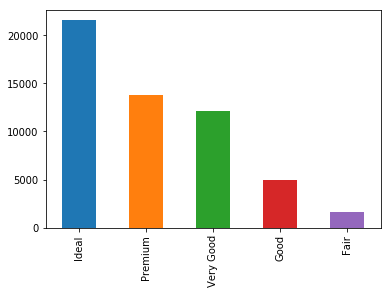

In [13]:
df['cut'].value_counts().plot('bar') # use 'count' to get the frequencies and then plot them

print('The data tend to have larger number of cut values of diamonds ')

## 7. Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance of the boxplots.

Conclusions: The Ideal cut has lowest median and the Premium has the least outliners. There is no abvious relationship we could see from the boxplot between price range, median and cut


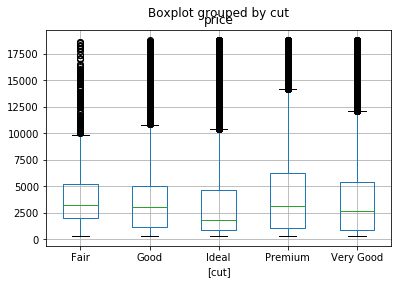

In [10]:
bp_df = df[['cut','price']] # get dataframe of 'cut' and 'price'
bp = bp_df.boxplot(by='cut') # boxplot the dataframe just created

print('Conclusions: The Ideal cut has lowest median and the Premium has the least outliners. There is no abvious relationship we could see from the boxplot between price range, median and cut')
    

## 8. Make histograms of the length, width, depth, and total depth attributes
and discuss any conclusions you can draw from the shape of the resulting distributions.

Conclusion: x is most likely to be a normal distribution


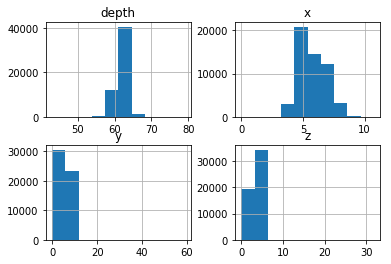

In [11]:
df2 = df[['x','y','z','depth']] # create dataframe of 'x','y','x','depth'
df2.hist() # use the dataframe to create histograms

print('Conclusion: x is most likely to be a normal distribution')

## 9. Make a scatter plot of price vs. carat. 
What can we say about the relationship between those two attributes?

There is a positive relationship between price and carat


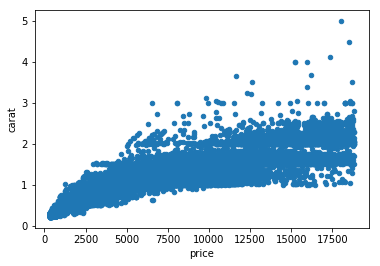

In [12]:
df3 = df[['price','carat']] # create a dataframe with 'price' and 'carat'
ax2 = df3.plot.scatter(x='price',  # use the dataframe just created to plot a scatter
                        y='carat')
ax2;

print('There is a positive relationship between price and carat')